## Processamento de Linguagem Natural para Análise de Críticas de Filmes

Database em https://www.kaggle.com/luisfredgs/imdb-ptbr

In [1]:
import pandas as pd

In [2]:
review = pd.read_csv("imdb-reviews-pt-br.csv")
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
# trocando neg por 0 e pos por 1
change = review["sentiment"].replace(["neg", "pos"], [0, 1])
change.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [4]:
# adicionando coluna a review
review["sentimentBIN"] = change
review.head()

,id,text_en,text_pt,sentiment,sentimentBIN
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [5]:
# checando se dados estão balanceados para executar treinamento
print(review["sentimentBIN"].value_counts())

0    24765
1    24694
Name: sentimentBIN, dtype: int64


In [6]:
# retirando acentuação
!pip install unidecode
import unidecode

withoutAccentuation = list()

for i in review["text_pt"]: 
    withoutAccentuation.append(unidecode.unidecode(i))
    
review['reviewWithoutAccentuation'] = withoutAccentuation

review['reviewWithoutAccentuation'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessario. Alem das terriveis sequencias de resgate no mar, das quais ha muito poucas, eu simplesmente nao me importei com nenhum dos personagens. A maioria de nos tem fantasmas no armario, e o personagem Costers e realizado logo no inicio, e depois esquecido ate muito mais tarde, quando eu nao me importava. O personagem com o qual deveriamos nos importar e muito arrogante e superconfiante, Ashton Kutcher. O problema e que ele sai como um garoto que pensa que e melhor do que qualquer outra pessoa ao seu redor e nao mostra sinais de um armario desordenado. Seu unico obstaculo parece estar vencendo Costner. Finalmente, quando estamos bem alem do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher e levado a ser o melhor sem pressentimentos ou pressagios anteriores. Nenhuma magica aqui, era tudo que eu podia fazer para nao desligar uma hora.'

In [7]:
# deixando tudo minúsculo
lowercasePhrase = list()

for i in review["reviewWithoutAccentuation"]: 
    lowercasePhrase.append(i.lower())

review['reviewLowercase'] = lowercasePhrase

review['reviewLowercase'][0]

'mais uma vez, o sr. costner arrumou um filme por muito mais tempo do que o necessario. alem das terriveis sequencias de resgate no mar, das quais ha muito poucas, eu simplesmente nao me importei com nenhum dos personagens. a maioria de nos tem fantasmas no armario, e o personagem costers e realizado logo no inicio, e depois esquecido ate muito mais tarde, quando eu nao me importava. o personagem com o qual deveriamos nos importar e muito arrogante e superconfiante, ashton kutcher. o problema e que ele sai como um garoto que pensa que e melhor do que qualquer outra pessoa ao seu redor e nao mostra sinais de um armario desordenado. seu unico obstaculo parece estar vencendo costner. finalmente, quando estamos bem alem do meio do caminho, costner nos conta sobre os fantasmas dos kutchers. somos informados de por que kutcher e levado a ser o melhor sem pressentimentos ou pressagios anteriores. nenhuma magica aqui, era tudo que eu podia fazer para nao desligar uma hora.'

### WORLD CLOUD

Biblioteca em https://github.com/amueller/word_cloud

In [8]:
# download data
!pip install -U nltk
import nltk
nltk.download('all')

Requirement already up-to-date: nltk in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.4)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package cess_

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     /U

True

In [55]:
# stop words da ntlk
from nltk import tokenize
stopWords = nltk.corpus.stopwords.words("portuguese")

# stop words de pontuação
from string import punctuation
punctuationStopWords = list()

for dot in punctuation:
    punctuationStopWords.append(dot)
    
stopWords.extend(punctuationStopWords)

# stop words de caso
newStopWords = ["filme", "filmes", "...", "voce", "tao", "ha", "ter"]
stopWords.extend(newStopWords)

print(stopWords)
    

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [56]:
withoutStopWords = list()
spaceToken = tokenize.WordPunctTokenizer()

for i in review["reviewLowercase"]:
    phrase = list()
    textWords = spaceToken.tokenize(i)
    
    for words in textWords:
        if words not in stopWords:
            phrase.append(words)
    
    withoutStopWords.append(' '.join(phrase))

review['reviewWithoutStopWords'] = withoutStopWords

review['reviewWithoutStopWords'][0]

'vez sr costner arrumou tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente nao importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido ate tarde nao importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor nao mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer nao desligar hora'

In [57]:
!pip install wordcloud
!python -m pip install -U matplotlib

%matplotlib inline

Requirement already up-to-date: matplotlib in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.0.3)


In [58]:
from wordcloud import WordCloud

# nuvem de palavras positivas
posReview = review.query("sentiment=='pos'")
print(posReview["reviewWithoutStopWords"][12389])

wordsPos = ' '.join([word for word in posReview["reviewWithoutStopWords"]])

vi ontem noite ser persuadido alguns amigos admitiria relutante ve lo porque sabia ashton kutcher so conseguia fazer comedia errado kutcher interpretou personagem jake fischer bem kevin costner interpretou ben randall tal profissionalismo sinal bom pode brincar emocoes fez exatamente todo teatro vendido superado riso durante primeira metade levado lagrimas durante segundo semestre sair teatro nao so vi muitas mulheres lagrimas tambem muitos homens adultos tentando desesperadamente nao deixar ninguem ve los chorando otimo sugiro va ve lo antes julgar


In [59]:
cloudPos = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsPos)

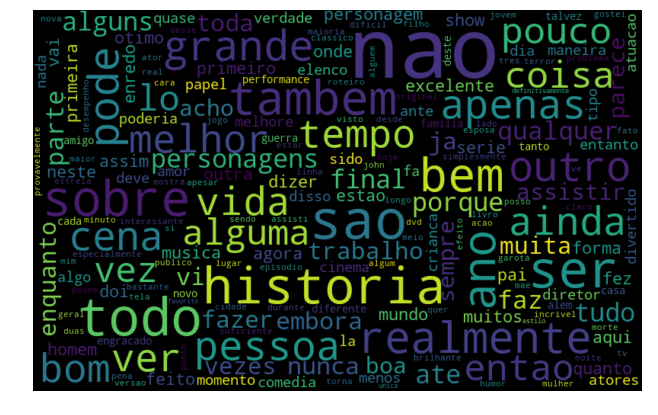

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,7))
plt.imshow(cloudPos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
# nuvem de palavras negativas
negReview = review.query("sentiment=='neg'")
print(negReview["reviewWithoutStopWords"][0])

wordsNeg = ' '.join([word for word in negReview["reviewWithoutStopWords"]])

vez sr costner arrumou tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente nao importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido ate tarde nao importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor nao mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer nao desligar hora


In [62]:
cloudNeg = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsNeg)

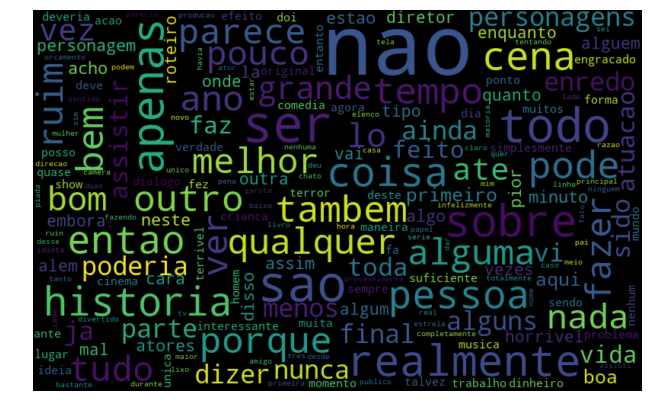

In [63]:
plt.figure(figsize=(30,7))
plt.imshow(cloudNeg, interpolation="bilinear")
plt.axis("off")
plt.show()

In [64]:
spaceToken = tokenize.WordPunctTokenizer()
allWords = ' '.join([text for text in review["reviewWithoutStopWords"]])

frequency = nltk.FreqDist(spaceToken.tokenize(allWords))

frequencyDF = pd.DataFrame({"Palavras": list(frequency.keys()),
                           "Frequencia": list(frequency.values())})
frequencyDF.head()

,Palavras,Frequencia
0,vez,15428
1,sr,1888
2,costner,71
3,arrumou,3
4,tempo,16207


In [65]:
frequencyDFtop10 = frequencyDF.nlargest(columns="Frequencia", n=30)
frequencyDFtop10

,Palavras,Frequencia
14,nao,147337
77,sao,35320
62,ser,34175
58,sobre,29093
154,realmente,24862
440,historia,23911
369,apenas,23904
54,bem,23226
209,tambem,22910
136,todos,21670


In [66]:
!pip install seaborn

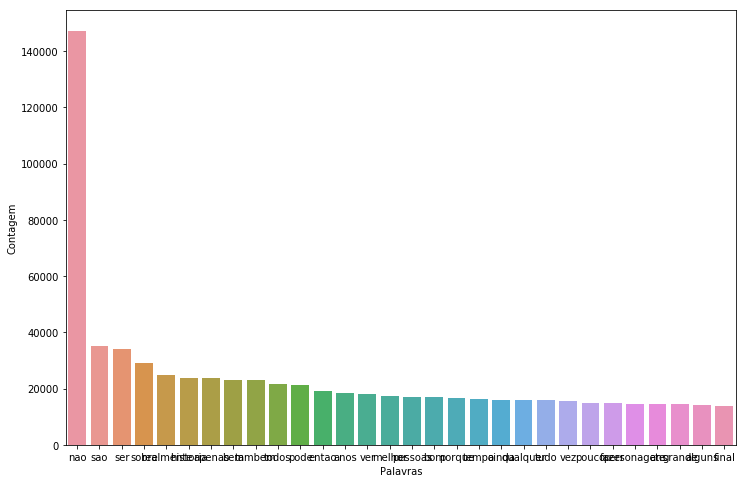

In [67]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=frequencyDFtop10, x="Palavras", y="Frequencia")
ax.set(ylabel="Contagem")
plt.show()

### BAG OF WORDS
Neste modelo, o texto (uma frase ou documento) é representado como um multiconjunto de suas palavras (o "saco"), desconsiderando a estrutura gramatical e até mesmo a ordenação delas, mas mantendo sua multiplicidade


In [68]:
# implementando bag of words (fazendo dicionário de palavras)
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
model = CountVectorizer(lowercase=True, max_features=50)

bagOfWords = model.fit_transform(review["reviewWithoutStopWords"])
model.get_feature_names()

['ainda',
 'algumas',
 'alguns',
 'anos',
 'apenas',
 'assistir',
 'ate',
 'bem',
 'bom',
 'cenas',
 'coisa',
 'dizer',
 'enredo',
 'entao',
 'faz',
 'fazer',
 'final',
 'grande',
 'historia',
 'ja',
 'lo',
 'melhor',
 'menos',
 'nada',
 'nao',
 'nunca',
 'parece',
 'parte',
 'personagens',
 'pessoas',
 'pode',
 'poderia',
 'porque',
 'pouco',
 'qualquer',
 'realmente',
 'ruim',
 'sao',
 'ser',
 'sobre',
 'tambem',
 'tempo',
 'the',
 'todo',
 'todos',
 'tudo',
 'ver',
 'vez',
 'vi',
 'vida']

In [70]:
# transformando numa matriz para visualizar melhor
dictionary = pd.SparseDataFrame(bagOfWords, columns = model.get_feature_names())
dictionary.head()

,ainda,algumas,alguns,anos,apenas,assistir,ate,bem,bom,cenas,...,tambem,tempo,the,todo,todos,tudo,ver,vez,vi,vida
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,2.0,NaN,1.0,NaN,NaN
3,1.0,NaN,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,2.0,NaN,1.0,NaN,1.0,NaN
4,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# separando dados para treino e teste (75% treino, 25% teste)
from sklearn.model_selection import train_test_split

In [72]:
train, test, trainClass, testClass = train_test_split(bagOfWords, review["sentimentBIN"], random_state = 42)

In [73]:
print(train.shape)
print(test.shape)

(37094, 50)
(12365, 50)


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
# treinando
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(train, trainClass)

# testando
score = logisticRegression.score(test, testClass)
print(score)

0.6984229680549939
